In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Tiền xử lý dữ liệu

In [529]:
movies = pd.read_csv('movies.csv')
movies.head()

,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path
0,https://www.imdb.com/title/tt12637874/?ref_=sr...,Fallout,8.5,"Action, Adventure, Drama","Ella Purnell, Aaron Moten, Walton Goggins, Moi...","April 10, 2024 (United States)",1 hour,United States,English,"In a future, post-apocalyptic Los Angeles brou...",NaN,TV-MA,"Jonathan Nolan, Clare Kilner, Frederick E.O. T...","Chaz Hawkins, Chaz Hawkins, Geneva Robertson-D...",posters1/poster_1.jpg
1,https://www.imdb.com/title/tt13649112/?ref_=sr...,Baby Reindeer,8.0,"Biography, Comedy, Drama","Richard Gadd, Jessica Gunning, Nava Mau, Micha...","April 11, 2024 (United States)",30 minutes,United Kingdom,English,The story follows writer and performer Richard...,NaN,TV-MA,"Weronika Tofilska, Josephine Bornebusch","Richard Gadd, Richard Gadd, Richard Gadd",posters1/poster_2.jpg
2,https://www.imdb.com/title/tt16426418/?ref_=sr...,Challengers,7.8,"Drama, Romance, Sport","Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","April 26, 2024 (United States)",2 hours 11 minutes,United States,English,"Tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,Luca Guadagnino,Justin Kuritzkes,posters1/poster_3.jpg
3,https://www.imdb.com/title/tt2788316/?ref_=sr_t_4,Shogun,8.8,"Adventure, Drama, History","Cosmo Jarvis, Anna Sawai, Tadanobu Asano, Yûki...","February 27, 2024 (United States)",1 hour,United States,Japanese,When a mysterious European ship is found maroo...,NaN,TV-MA,"Frederick E.O. Toye, Jonathan van Tulleken, Ch...","James Clavell, Maegan Houang, Maegan Houang, R...",posters1/poster_4.jpg
4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,The Fall Guy,7.3,"Action, Comedy, Drama","Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","May 3, 2024 (United States)",2 hours 6 minutes,United States,English,A down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,David Leitch,"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg


In [530]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie_Link          2241 non-null   object
 1   Movie_Name          2241 non-null   object
 2   Ratings             2164 non-null   object
 3   Movie_category      2240 non-null   object
 4   Film_Actor          2241 non-null   object
 5   Release_Date        2227 non-null   object
 6   Duration            2091 non-null   object
 7   Country             2240 non-null   object
 8   Original_Language   2223 non-null   object
 9   Description         2240 non-null   object
 10  Box Office          1114 non-null   object
 11  Certificate (MPAA)  2031 non-null   object
 12  Directors           2232 non-null   object
 13  Writing_Credits     2116 non-null   object
 14  poster_path         2241 non-null   object
dtypes: object(15)
memory usage: 262.7+ KB


In [531]:
#Tạo id phân biệt cho mỗi bộ phim
movies = movies.reset_index()
movies = movies.rename(columns={'index': 'movie_id'})

In [533]:
import pandas as pd
import ast

# Hàm kiểm tra và thay đổi định dạng của giá trị trong cột Film_Actor
def correct_actor_format(actors_str):
    try:
        # Cố gắng chuyển đổi chuỗi thành danh sách
        actors_list = ast.literal_eval(actors_str)
        if isinstance(actors_list, list) and all(isinstance(i, tuple) and len(i) == 2 and all(isinstance(x, str) for x in i) for i in actors_list):
            # Lấy tên diễn viên đầu tiên từ mỗi tuple
            corrected_actors = ', '.join(x[0] for x in actors_list)
            return corrected_actors
        else:
            # Nếu không phải danh sách các tuple, trả về chuỗi ban đầu
            return actors_str
    except (ValueError, SyntaxError):
        # Nếu không chuyển đổi được (chuỗi không hợp lệ), trả về chuỗi ban đầu
        return actors_str

# Áp dụng hàm để thay đổi định dạng cho cột Film_Actor
movies['Film_Actor'] = movies['Film_Actor'].apply(correct_actor_format)

In [535]:
movies.isnull().sum()

movie_id                 0
Movie_Link               0
Movie_Name               0
Ratings                 77
Movie_category           1
Film_Actor               0
Release_Date            14
Duration               150
Country                  1
Original_Language       18
Description              1
Box Office            1127
Certificate (MPAA)     210
Directors                9
Writing_Credits        125
poster_path              0
dtype: int64

In [537]:
movies.dropna(inplace=True)

In [538]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 2 to 2236
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_id            986 non-null    int64 
 1   Movie_Link          986 non-null    object
 2   Movie_Name          986 non-null    object
 3   Ratings             986 non-null    object
 4   Movie_category      986 non-null    object
 5   Film_Actor          986 non-null    object
 6   Release_Date        986 non-null    object
 7   Duration            986 non-null    object
 8   Country             986 non-null    object
 9   Original_Language   986 non-null    object
 10  Description         986 non-null    object
 11  Box Office          986 non-null    object
 12  Certificate (MPAA)  986 non-null    object
 13  Directors           986 non-null    object
 14  Writing_Credits     986 non-null    object
 15  poster_path         986 non-null    object
dtypes: int64(1), object(15)
memory

In [539]:
movies.duplicated().sum()

0

In [540]:
movies[movies['Movie_Name']=='Dune']

,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path
74,74,https://www.imdb.com/title/tt1160419/?ref_=sr_...,Dune,8.0,"Action, Adventure, Drama","Timothée Chalamet, Rebecca Ferguson, Zendaya, ...","October 22, 2021 (United States)",2 hours 35 minutes,United States,English,A noble family becomes embroiled in a war for ...,"$407,573,628",Rated PG-13,Denis Villeneuve,"Jon Spaihts, Denis Villeneuve, Eric Roth, Fran...",posters1/poster_75.jpg
226,226,https://www.imdb.com/title/tt0087182/?ref_=sr_...,Dune,6.3,"Action, Adventure, Sci-Fi","Kyle MacLachlan, Virginia Madsen, Francesca An...","December 14, 1984 (United States)",2 hours 17 minutes,United States,English,A Duke's son leads desert warriors against the...,"$30,985,338",PG-13,David Lynch,"Frank Herbert, David Lynch",posters1/poster_227.jpg


Có những bộ phim trùng tên nhưng là hai phần khác nhau, do đó đưa xóa những dòng có cùng tên và cùng năm ra mắt

In [541]:
from dateutil import parser

def convert_to_date(date_str):
    try:
        # Tách phần ngày và bỏ phần quốc gia trong ngoặc đơn
        date_str = date_str.split('(')[0].strip()
        return parser.parse(date_str)
    except Exception as e:
        print(f"Error parsing date: {date_str}, error: {e}")
        return pd.NaT

In [542]:
movies['Release_Date'] = movies['Release_Date'].apply(convert_to_date)
movies['Release_Date'] = pd.to_datetime(movies['Release_Date'])
movies['Released_Year'] = movies['Release_Date'].dt.year

In [543]:
movies['Released_Year'] = movies['Released_Year'].fillna(-1)  # fill NaN values with -1 or any other integer
movies['Released_Year'] = movies['Released_Year'].astype(int)  # convert to integer

In [544]:
movies.head()

,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year
2,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,Challengers,7.8,"Drama, Romance, Sport","Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",2024-04-26,2 hours 11 minutes,United States,English,"Tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,Luca Guadagnino,Justin Kuritzkes,posters1/poster_3.jpg,2024
4,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,The Fall Guy,7.3,"Action, Comedy, Drama","Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",2024-05-03,2 hours 6 minutes,United States,English,A down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,David Leitch,"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024
6,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,Civil War,7.6,"Action, Adventure, Thriller","Kirsten Dunst, Wagner Moura, Cailee Spaeny, Ni...",2024-04-12,1 hour 49 minutes,United States,English,"A journey across a dystopian future America, f...","$105,916,925",Rated R,Alex Garland,Alex Garland,posters1/poster_7.jpg,2024
7,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,Anyone But You,6.1,"Comedy, Romance","Sydney Sweeney, Glen Powell, Alexandra Shipp, ...",2023-12-22,1 hour 43 minutes,United States,English,"After an amazing first date, Bea and Ben's fie...","$219,468,571",Rated R,Will Gluck,"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023
9,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,Dune: Part Two,8.7,"Action, Adventure, Drama","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",2024-03-01,2 hours 46 minutes,United States,English,Paul Atreides unites with Chani and the Fremen...,"$708,703,191",Rated PG-13,Denis Villeneuve,"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024


In [545]:
#Xóa dòng có cùng tên và năm ra mắt
movies = movies.drop_duplicates(subset=['Movie_Name', 'Released_Year'])

In [546]:
movies[movies['Movie_Name']=='Dune']

,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year
74,74,https://www.imdb.com/title/tt1160419/?ref_=sr_...,Dune,8.0,"Action, Adventure, Drama","Timothée Chalamet, Rebecca Ferguson, Zendaya, ...",2021-10-22,2 hours 35 minutes,United States,English,A noble family becomes embroiled in a war for ...,"$407,573,628",Rated PG-13,Denis Villeneuve,"Jon Spaihts, Denis Villeneuve, Eric Roth, Fran...",posters1/poster_75.jpg,2021
226,226,https://www.imdb.com/title/tt0087182/?ref_=sr_...,Dune,6.3,"Action, Adventure, Sci-Fi","Kyle MacLachlan, Virginia Madsen, Francesca An...",1984-12-14,2 hours 17 minutes,United States,English,A Duke's son leads desert warriors against the...,"$30,985,338",PG-13,David Lynch,"Frank Herbert, David Lynch",posters1/poster_227.jpg,1984


In [547]:
movies

,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year
2,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,Challengers,7.8,"Drama, Romance, Sport","Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",2024-04-26,2 hours 11 minutes,United States,English,"Tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,Luca Guadagnino,Justin Kuritzkes,posters1/poster_3.jpg,2024
4,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,The Fall Guy,7.3,"Action, Comedy, Drama","Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",2024-05-03,2 hours 6 minutes,United States,English,A down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,David Leitch,"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024
6,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,Civil War,7.6,"Action, Adventure, Thriller","Kirsten Dunst, Wagner Moura, Cailee Spaeny, Ni...",2024-04-12,1 hour 49 minutes,United States,English,"A journey across a dystopian future America, f...","$105,916,925",Rated R,Alex Garland,Alex Garland,posters1/poster_7.jpg,2024
7,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,Anyone But You,6.1,"Comedy, Romance","Sydney Sweeney, Glen Powell, Alexandra Shipp, ...",2023-12-22,1 hour 43 minutes,United States,English,"After an amazing first date, Bea and Ben's fie...","$219,468,571",Rated R,Will Gluck,"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023
9,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,Dune: Part Two,8.7,"Action, Adventure, Drama","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",2024-03-01,2 hours 46 minutes,United States,English,Paul Atreides unites with Chani and the Fremen...,"$708,703,191",Rated PG-13,Denis Villeneuve,"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,2228,https://www.themoviedb.org/movie/401981-red-sp...,Điệp Vụ Chim Sẻ Đỏ,65%,"Phim Gây Cấn, Phim Bí Ẩn","Jennifer Lawrence, Joel Edgerton, Matthias Sch...",2018-03-02,2h 20m,khong ro,Tiếng Anh,Red Sparrow - Điệp Vụ Chim Sẻ Đỏ (2018) với sự...,"$151,572,634.00",khong ro,Francis Lawrence,Justin Haythe,posters3/poster_228.jpg,2018
2230,2230,https://www.themoviedb.org/movie/1022796-wish,Điều Ước,65%,"Phim Hoạt Hình, Phim Gia Đình, Phim Giả Tượng,...","Ariana DeBose, Chris Pine, Alan Tudyk, Angeliq...",2023-11-24,1h 35m,khong ro,Tiếng Anh,“Wish” là bộ phim hoạt hình kỷ niệm 100 năm th...,"$251,720,820.00",khong ro,"Fawn Veerasunthorn, Chris Buck","Allison Moore, Jennifer Lee",posters3/poster_230.jpg,2023
2231,2231,https://www.themoviedb.org/movie/1107387,Hachiko,76%,"Phim Chính Kịch, Phim Gia Đình","Feng Xiaogang, Joan Chen, Bai Jugang, Huang Ch...",2023-03-31,2h 4m,khong ro,Tiếng Trung Quốc,This is the story of a puppy that touched hund...,"$42,423,217.00",khong ro,Xu Ang,Xu Ang,posters3/poster_231.jpg,2023
2232,2232,https://www.themoviedb.org/movie/293167-kong-s...,Kong: Đảo Đầu Lâu,65%,"Phim Hành Động, Phim Phiêu Lưu, Phim Giả Tượng","Tom Hiddleston, Samuel L. Jackson, John Goodma...",2017-03-10,1h 58m,khong ro,Tiếng Anh,"Phim ""Kong: Skull Island"" (""Kong: Đảo Đầu Lâu""...","$566,652,812.00",khong ro,Jordan Vogt-Roberts,"Dan Gilroy, Derek Connolly, Max Borenstein",posters3/poster_232.jpg,2017


In [548]:
movies.to_csv('movies_with_id.csv', index=False)

In [549]:
new_df = pd.read_csv('movies_with_id.csv')
new_df.head()

,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year
0,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,Challengers,7.8,"Drama, Romance, Sport","Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",2024-04-26,2 hours 11 minutes,United States,English,"Tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,Luca Guadagnino,Justin Kuritzkes,posters1/poster_3.jpg,2024
1,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,The Fall Guy,7.3,"Action, Comedy, Drama","Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",2024-05-03,2 hours 6 minutes,United States,English,A down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,David Leitch,"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024
2,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,Civil War,7.6,"Action, Adventure, Thriller","Kirsten Dunst, Wagner Moura, Cailee Spaeny, Ni...",2024-04-12,1 hour 49 minutes,United States,English,"A journey across a dystopian future America, f...","$105,916,925",Rated R,Alex Garland,Alex Garland,posters1/poster_7.jpg,2024
3,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,Anyone But You,6.1,"Comedy, Romance","Sydney Sweeney, Glen Powell, Alexandra Shipp, ...",2023-12-22,1 hour 43 minutes,United States,English,"After an amazing first date, Bea and Ben's fie...","$219,468,571",Rated R,Will Gluck,"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023
4,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,Dune: Part Two,8.7,"Action, Adventure, Drama","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",2024-03-01,2 hours 46 minutes,United States,English,Paul Atreides unites with Chani and the Fremen...,"$708,703,191",Rated PG-13,Denis Villeneuve,"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024


In [550]:
new_df

,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year
0,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,Challengers,7.8,"Drama, Romance, Sport","Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",2024-04-26,2 hours 11 minutes,United States,English,"Tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,Luca Guadagnino,Justin Kuritzkes,posters1/poster_3.jpg,2024
1,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,The Fall Guy,7.3,"Action, Comedy, Drama","Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",2024-05-03,2 hours 6 minutes,United States,English,A down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,David Leitch,"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024
2,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,Civil War,7.6,"Action, Adventure, Thriller","Kirsten Dunst, Wagner Moura, Cailee Spaeny, Ni...",2024-04-12,1 hour 49 minutes,United States,English,"A journey across a dystopian future America, f...","$105,916,925",Rated R,Alex Garland,Alex Garland,posters1/poster_7.jpg,2024
3,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,Anyone But You,6.1,"Comedy, Romance","Sydney Sweeney, Glen Powell, Alexandra Shipp, ...",2023-12-22,1 hour 43 minutes,United States,English,"After an amazing first date, Bea and Ben's fie...","$219,468,571",Rated R,Will Gluck,"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023
4,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,Dune: Part Two,8.7,"Action, Adventure, Drama","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",2024-03-01,2 hours 46 minutes,United States,English,Paul Atreides unites with Chani and the Fremen...,"$708,703,191",Rated PG-13,Denis Villeneuve,"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,2228,https://www.themoviedb.org/movie/401981-red-sp...,Điệp Vụ Chim Sẻ Đỏ,65%,"Phim Gây Cấn, Phim Bí Ẩn","Jennifer Lawrence, Joel Edgerton, Matthias Sch...",2018-03-02,2h 20m,khong ro,Tiếng Anh,Red Sparrow - Điệp Vụ Chim Sẻ Đỏ (2018) với sự...,"$151,572,634.00",khong ro,Francis Lawrence,Justin Haythe,posters3/poster_228.jpg,2018
974,2230,https://www.themoviedb.org/movie/1022796-wish,Điều Ước,65%,"Phim Hoạt Hình, Phim Gia Đình, Phim Giả Tượng,...","Ariana DeBose, Chris Pine, Alan Tudyk, Angeliq...",2023-11-24,1h 35m,khong ro,Tiếng Anh,“Wish” là bộ phim hoạt hình kỷ niệm 100 năm th...,"$251,720,820.00",khong ro,"Fawn Veerasunthorn, Chris Buck","Allison Moore, Jennifer Lee",posters3/poster_230.jpg,2023
975,2231,https://www.themoviedb.org/movie/1107387,Hachiko,76%,"Phim Chính Kịch, Phim Gia Đình","Feng Xiaogang, Joan Chen, Bai Jugang, Huang Ch...",2023-03-31,2h 4m,khong ro,Tiếng Trung Quốc,This is the story of a puppy that touched hund...,"$42,423,217.00",khong ro,Xu Ang,Xu Ang,posters3/poster_231.jpg,2023
976,2232,https://www.themoviedb.org/movie/293167-kong-s...,Kong: Đảo Đầu Lâu,65%,"Phim Hành Động, Phim Phiêu Lưu, Phim Giả Tượng","Tom Hiddleston, Samuel L. Jackson, John Goodma...",2017-03-10,1h 58m,khong ro,Tiếng Anh,"Phim ""Kong: Skull Island"" (""Kong: Đảo Đầu Lâu""...","$566,652,812.00",khong ro,Jordan Vogt-Roberts,"Dan Gilroy, Derek Connolly, Max Borenstein",posters3/poster_232.jpg,2017


In [551]:
movie_id = 900
new_df[new_df['movie_id'] == movie_id].Movie_Link.values[0]

'https://www.imdb.com/title/tt2802144/?ref_=sr_t_401'

In [552]:
# movies = movies[['movie_id', 'Movie_Name', 'Description', 'Movie_category', 'Film_Actor', 'Directors']]
movies

,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year
2,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,Challengers,7.8,"Drama, Romance, Sport","Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",2024-04-26,2 hours 11 minutes,United States,English,"Tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,Luca Guadagnino,Justin Kuritzkes,posters1/poster_3.jpg,2024
4,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,The Fall Guy,7.3,"Action, Comedy, Drama","Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",2024-05-03,2 hours 6 minutes,United States,English,A down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,David Leitch,"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024
6,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,Civil War,7.6,"Action, Adventure, Thriller","Kirsten Dunst, Wagner Moura, Cailee Spaeny, Ni...",2024-04-12,1 hour 49 minutes,United States,English,"A journey across a dystopian future America, f...","$105,916,925",Rated R,Alex Garland,Alex Garland,posters1/poster_7.jpg,2024
7,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,Anyone But You,6.1,"Comedy, Romance","Sydney Sweeney, Glen Powell, Alexandra Shipp, ...",2023-12-22,1 hour 43 minutes,United States,English,"After an amazing first date, Bea and Ben's fie...","$219,468,571",Rated R,Will Gluck,"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023
9,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,Dune: Part Two,8.7,"Action, Adventure, Drama","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",2024-03-01,2 hours 46 minutes,United States,English,Paul Atreides unites with Chani and the Fremen...,"$708,703,191",Rated PG-13,Denis Villeneuve,"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,2228,https://www.themoviedb.org/movie/401981-red-sp...,Điệp Vụ Chim Sẻ Đỏ,65%,"Phim Gây Cấn, Phim Bí Ẩn","Jennifer Lawrence, Joel Edgerton, Matthias Sch...",2018-03-02,2h 20m,khong ro,Tiếng Anh,Red Sparrow - Điệp Vụ Chim Sẻ Đỏ (2018) với sự...,"$151,572,634.00",khong ro,Francis Lawrence,Justin Haythe,posters3/poster_228.jpg,2018
2230,2230,https://www.themoviedb.org/movie/1022796-wish,Điều Ước,65%,"Phim Hoạt Hình, Phim Gia Đình, Phim Giả Tượng,...","Ariana DeBose, Chris Pine, Alan Tudyk, Angeliq...",2023-11-24,1h 35m,khong ro,Tiếng Anh,“Wish” là bộ phim hoạt hình kỷ niệm 100 năm th...,"$251,720,820.00",khong ro,"Fawn Veerasunthorn, Chris Buck","Allison Moore, Jennifer Lee",posters3/poster_230.jpg,2023
2231,2231,https://www.themoviedb.org/movie/1107387,Hachiko,76%,"Phim Chính Kịch, Phim Gia Đình","Feng Xiaogang, Joan Chen, Bai Jugang, Huang Ch...",2023-03-31,2h 4m,khong ro,Tiếng Trung Quốc,This is the story of a puppy that touched hund...,"$42,423,217.00",khong ro,Xu Ang,Xu Ang,posters3/poster_231.jpg,2023
2232,2232,https://www.themoviedb.org/movie/293167-kong-s...,Kong: Đảo Đầu Lâu,65%,"Phim Hành Động, Phim Phiêu Lưu, Phim Giả Tượng","Tom Hiddleston, Samuel L. Jackson, John Goodma...",2017-03-10,1h 58m,khong ro,Tiếng Anh,"Phim ""Kong: Skull Island"" (""Kong: Đảo Đầu Lâu""...","$566,652,812.00",khong ro,Jordan Vogt-Roberts,"Dan Gilroy, Derek Connolly, Max Borenstein",posters3/poster_232.jpg,2017


## Phân tích dữ liệu và trực quan hóa

Phân phối thể loại phim

In [553]:
df = movies

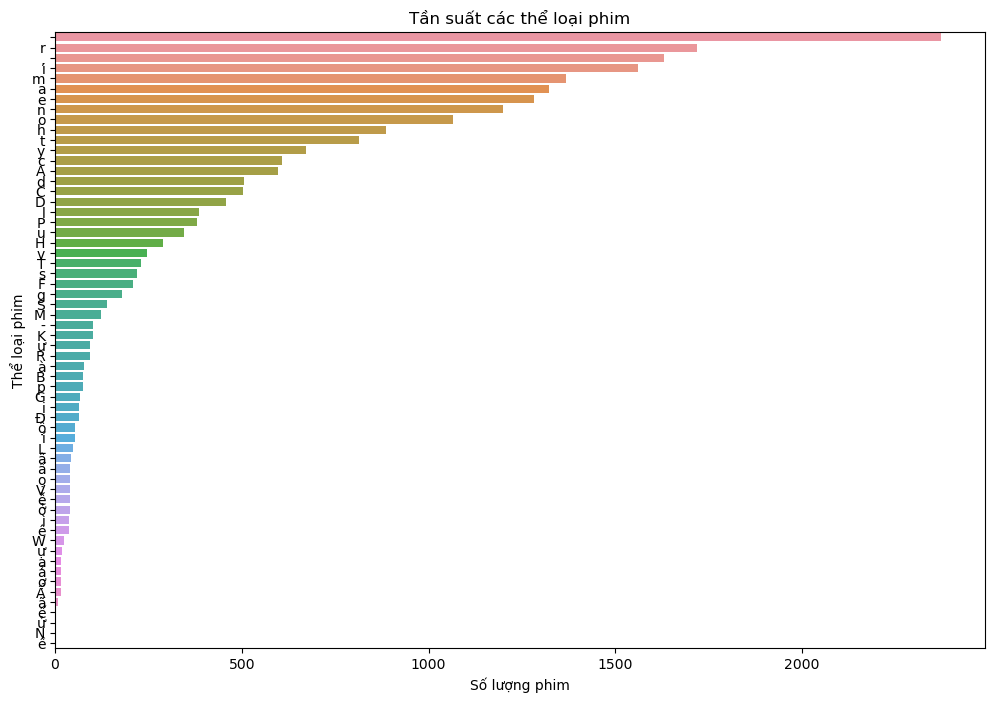

In [554]:
# Tách các thể loại phim
df['Movie_category'] = df['Movie_category']

# Đếm tần suất các thể loại phim
all_categories = [category for sublist in df['Movie_category'] for category in sublist]
category_counts = pd.Series(all_categories).value_counts()

# Vẽ biểu đồ tần suất các thể loại phim
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Tần suất các thể loại phim')
plt.xlabel('Số lượng phim')
plt.ylabel('Thể loại phim')
plt.show()


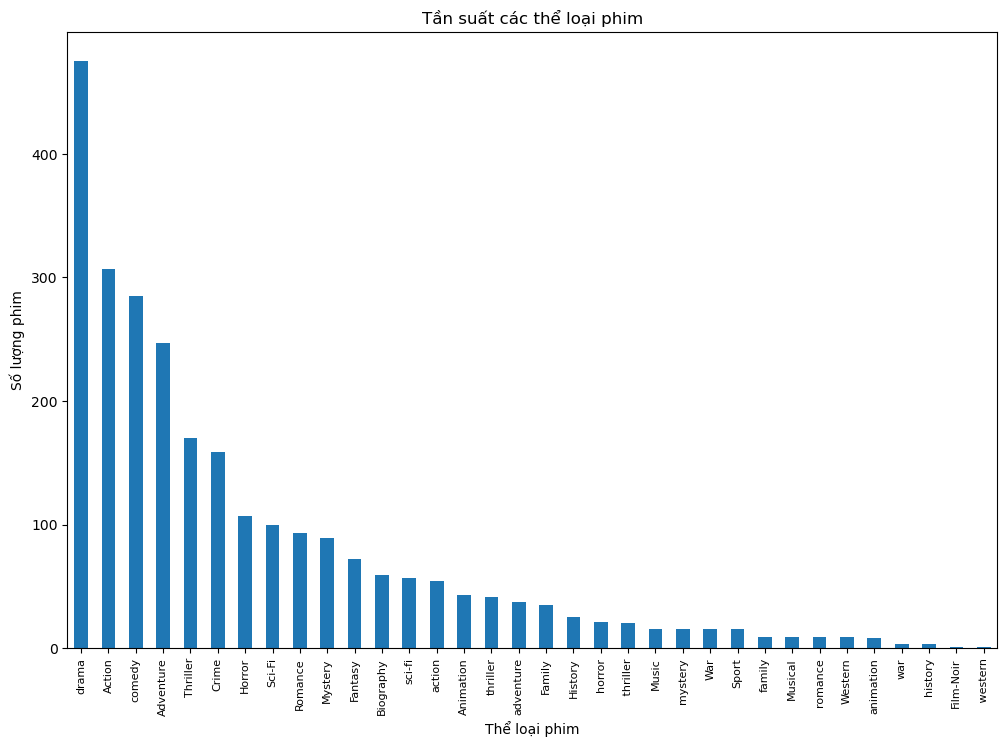

In [555]:
# Chuyển đổi cột 'Movie_category' thành chuỗi
df['Movie_category'] = df['Movie_category'].astype(str)

# Tách và dịch các thể loại phim
category_map = {
'comedy': 'comedy',
'phim hài': 'comedy',
'drama': 'drama',
'phim tài liệu': 'documentary',
'tình cảm': 'romance',
'phim tình cảm': 'romance',
'hành động': 'action',
'phim hành động': 'action',
'khoa học viễn tưởng': 'sci-fi',
'phim khoa học viễn tưởng': 'sci-fi',
'kinh dị': 'horror',
'phim kinh dị': 'horror',
'phiêu lưu': 'adventure',
'phim phiêu lưu': 'adventure',
'gia đình': 'family',
'phim gia đình': 'family',
'chiến tranh': 'war',
'phim chiến tranh': 'war',
'âm nhạc': 'music',
'phim âm nhạc': 'music',
'bí ẩn': 'mystery',
'phim bí ẩn': 'mystery',
'thể thao': 'sports',
'phim thể thao': 'sports',
'hoạt hình': 'animation',
'phim hoạt hình': 'animation',
'phim lịch sử': 'history',
'phim giả tượng':'sci-fi',
'phim lãng mạn':'romance',
'phim miền tây': ' western',
'phim hình sự': ' thriller',
'phim chính kịch': 'drama',
'phim gây cấn': 'thriller'
}

df['Movie_category'] = df['Movie_category'].str.split(',')
all_categories = []
for categories in df['Movie_category']:
    all_categories.extend([category_map.get(c.strip().lower(), c.strip()) for c in categories])

# Đếm tần suất các thể loại phim
category_counts = pd.Series(all_categories).value_counts()

# Sắp xếp các thể loại phim theo tần suất giảm dần
category_counts = category_counts.sort_values(ascending=False)

# Vẽ biểu đồ tần suất các thể loại phim
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Tần suất các thể loại phim')
plt.xlabel('Thể loại phim')
plt.ylabel('Số lượng phim')
plt.xticks(rotation=90, fontsize=8)
plt.show()

Phân phối diễn viên

In [556]:
df = movies

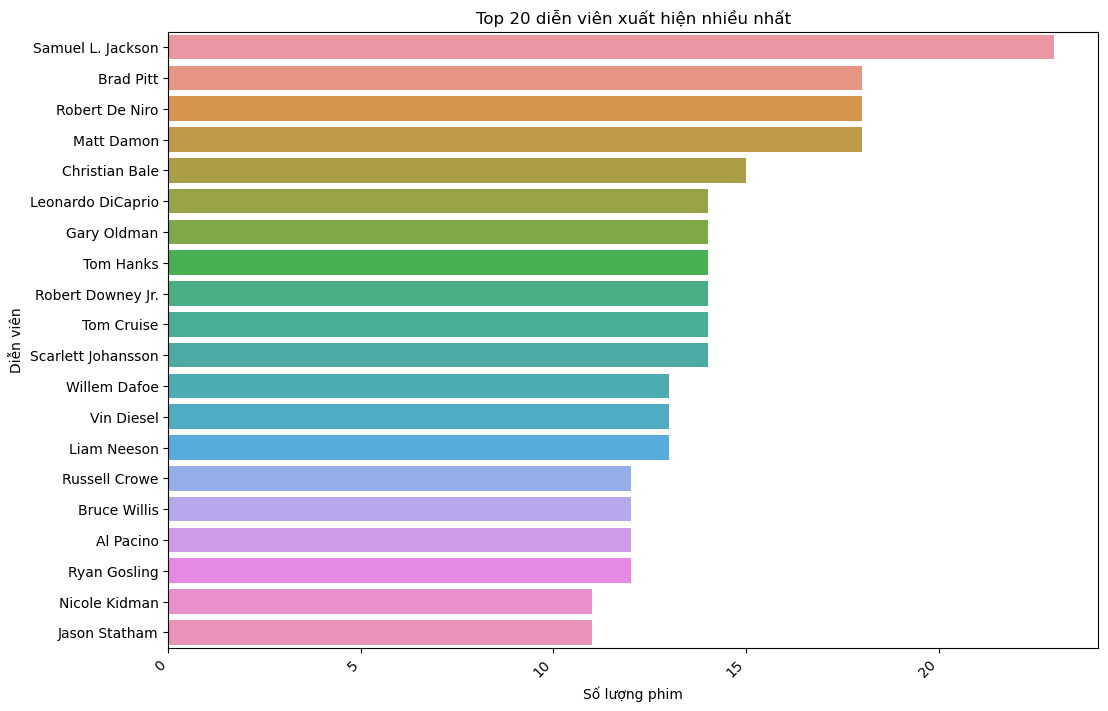

In [557]:
# Loại bỏ các dòng có tên diễn viên không đúng định dạng
df = df[df['Film_Actor'].notnull()]  # Loại bỏ các dòng có giá trị null
df = df[df['Film_Actor'].apply(lambda x: isinstance(x, str) and len(x.split(', ')) > 0)]

# Phân tích phân phối các diễn viên
# Tách các diễn viên
df['Film_Actor'] = df['Film_Actor'].apply(lambda x: x.split(', '))

# Đếm tần suất các diễn viên
all_actors = [actor for sublist in df['Film_Actor'] for actor in sublist if actor.strip()]
actor_counts = pd.Series(all_actors).value_counts().head(20)

# Vẽ biểu đồ tần suất các diễn viên
plt.figure(figsize=(12, 8))
sns.barplot(x=actor_counts.values, y=actor_counts.index)
plt.title('Top 20 diễn viên xuất hiện nhiều nhất')
plt.xlabel('Số lượng phim')
plt.ylabel('Diễn viên')
plt.xticks(rotation=45, ha='right')  # Xoay tên diễn viên để hiển thị rõ ràng
plt.show()


Phân phối đạo diễn

In [558]:
df = movies

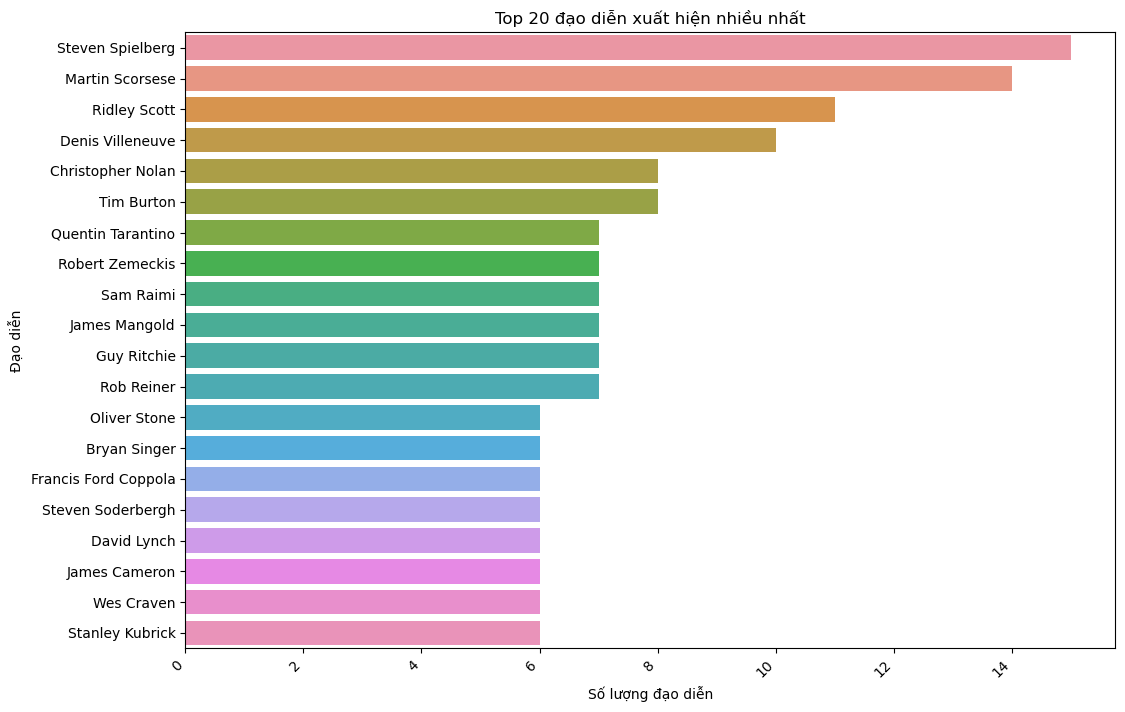

In [559]:
# Loại bỏ các dòng có tên diễn viên không đúng định dạng
df = df[df['Directors'].notnull()]  # Loại bỏ các dòng có giá trị null
df = df[df['Directors'].apply(lambda x: isinstance(x, str) and len(x.split(', ')) > 0)]

# Phân tích phân phối các diễn viên
# Tách các diễn viên
df['Directors'] = df['Directors'].apply(lambda x: x.split(', '))

# Đếm tần suất các diễn viên
all_actors = [actor for sublist in df['Directors'] for actor in sublist if actor.strip()]
actor_counts = pd.Series(all_actors).value_counts().head(20)

# Vẽ biểu đồ tần suất các diễn viên
plt.figure(figsize=(12, 8))
sns.barplot(x=actor_counts.values, y=actor_counts.index)
plt.title('Top 20 đạo diễn xuất hiện nhiều nhất')
plt.xlabel('Số lượng đạo diễn')
plt.ylabel('Đạo diễn')
plt.xticks(rotation=45, ha='right')  # Xoay tên diễn viên để hiển thị rõ ràng
plt.show()

Phân tích mô tả dữ liệu

In [560]:
# Thống kê mô tả các cột số
print(df.describe())

# Thống kê mô tả các cột phân loại
print(df.describe(include=['object']))


          movie_id                   Release_Date  Released_Year
count   978.000000                            978     978.000000
mean   1253.184049  2006-05-16 12:07:21.717791360    2005.842536
min       2.000000            1926-12-25 00:00:00    1926.000000
25%     773.250000            1997-10-10 00:00:00    1997.000000
50%    1290.000000            2010-04-15 00:00:00    2010.000000
75%    1749.000000            2018-05-14 12:00:00    2018.000000
max    2236.000000            2024-05-31 00:00:00    2024.000000
std     597.949313                            NaN      15.362883
                                               Movie_Link          Movie_Name  \
count                                                 978                 978   
unique                                                978                 968   
top     https://www.imdb.com/title/tt16426418/?ref_=sr...  Ghost in the Shell   
freq                                                    1                   2   

       Ra

Phân phối phim theo năm phát hành

Ma trận tương quan

## ChatGPT

In [561]:
movies['Movie_category'] = movies['Movie_category'].astype(str)
movies['Movie_category'] = movies['Movie_category'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.strip()
movies

,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year
2,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,Challengers,7.8,"Drama, Romance, Sport","Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",2024-04-26,2 hours 11 minutes,United States,English,"Tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,Luca Guadagnino,Justin Kuritzkes,posters1/poster_3.jpg,2024
4,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,The Fall Guy,7.3,"Action, Comedy, Drama","Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",2024-05-03,2 hours 6 minutes,United States,English,A down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,David Leitch,"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024
6,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,Civil War,7.6,"Action, Adventure, Thriller","Kirsten Dunst, Wagner Moura, Cailee Spaeny, Ni...",2024-04-12,1 hour 49 minutes,United States,English,"A journey across a dystopian future America, f...","$105,916,925",Rated R,Alex Garland,Alex Garland,posters1/poster_7.jpg,2024
7,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,Anyone But You,6.1,"Comedy, Romance","Sydney Sweeney, Glen Powell, Alexandra Shipp, ...",2023-12-22,1 hour 43 minutes,United States,English,"After an amazing first date, Bea and Ben's fie...","$219,468,571",Rated R,Will Gluck,"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023
9,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,Dune: Part Two,8.7,"Action, Adventure, Drama","Timothée Chalamet, Zendaya, Rebecca Ferguson, ...",2024-03-01,2 hours 46 minutes,United States,English,Paul Atreides unites with Chani and the Fremen...,"$708,703,191",Rated PG-13,Denis Villeneuve,"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,2228,https://www.themoviedb.org/movie/401981-red-sp...,Điệp Vụ Chim Sẻ Đỏ,65%,"Phim Gây Cấn, Phim Bí Ẩn","Jennifer Lawrence, Joel Edgerton, Matthias Sch...",2018-03-02,2h 20m,khong ro,Tiếng Anh,Red Sparrow - Điệp Vụ Chim Sẻ Đỏ (2018) với sự...,"$151,572,634.00",khong ro,Francis Lawrence,Justin Haythe,posters3/poster_228.jpg,2018
2230,2230,https://www.themoviedb.org/movie/1022796-wish,Điều Ước,65%,"Phim Hoạt Hình, Phim Gia Đình, Phim Giả Tượn...","Ariana DeBose, Chris Pine, Alan Tudyk, Angeliq...",2023-11-24,1h 35m,khong ro,Tiếng Anh,“Wish” là bộ phim hoạt hình kỷ niệm 100 năm th...,"$251,720,820.00",khong ro,"Fawn Veerasunthorn, Chris Buck","Allison Moore, Jennifer Lee",posters3/poster_230.jpg,2023
2231,2231,https://www.themoviedb.org/movie/1107387,Hachiko,76%,"Phim Chính Kịch, Phim Gia Đình","Feng Xiaogang, Joan Chen, Bai Jugang, Huang Ch...",2023-03-31,2h 4m,khong ro,Tiếng Trung Quốc,This is the story of a puppy that touched hund...,"$42,423,217.00",khong ro,Xu Ang,Xu Ang,posters3/poster_231.jpg,2023
2232,2232,https://www.themoviedb.org/movie/293167-kong-s...,Kong: Đảo Đầu Lâu,65%,"Phim Hành Động, Phim Phiêu Lưu, Phim Giả Tượng","Tom Hiddleston, Samuel L. Jackson, John Goodma...",2017-03-10,1h 58m,khong ro,Tiếng Anh,"Phim ""Kong: Skull Island"" (""Kong: Đảo Đầu Lâu""...","$566,652,812.00",khong ro,Jordan Vogt-Roberts,"Dan Gilroy, Derek Connolly, Max Borenstein",posters3/poster_232.jpg,2017


In [562]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import SequenceMatcher

# Tải dữ liệu
df = movies

# Chuyển đổi tất cả các cột văn bản thành chữ thường
df['Movie_Name'] = df['Movie_Name'].str.lower()
df['Movie_category'] = df['Movie_category'].str.lower().fillna('')
df['Film_Actor'] = df['Film_Actor'].str.lower().fillna('')
df['Directors'] = df['Directors'].str.lower().fillna('')
df['Description'] = df['Description'].str.lower().fillna('')


# Kết hợp tất cả các tính năng văn bản vào một cột duy nhất
df['combined_features'] = df['Movie_category'] + ' ' + df['Film_Actor'] + ' ' + df['Directors'] + ' ' + df['Description']

# Vector hóa TF-IDF cho các tính năng kết hợp
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Tính toán ma trận tương đồng cosine
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Hàm để tính toán mức độ tương đồng của tên phim
def title_similarity(title1, title2):
    return SequenceMatcher(None, title1, title2).ratio()

# Hàm để lấy gợi ý phim dựa trên sự kết hợp của cosine similarity và title similarity
def get_recommendations(title, cosine_sim=cosine_sim, df=df, n_recommendations=10):
    title = title.lower()  # Chuyển đổi tên phim đầu vào thành chữ thường
    if title not in df['Movie_Name'].values:
        return f"Phim '{title}' không có trong cơ sở dữ liệu."
    
    # Tìm chỉ số của phim đầu vào
    idx = df[df['Movie_Name'] == title].index[0]
    
    # Lấy điểm cosine similarity cho phim đầu vào
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Tính toán mức độ tương đồng của tên phim
    title_sim_scores = [(i, title_similarity(title, df.iloc[i]['Movie_Name'])) for i in range(len(df))]
    
    # Kết hợp điểm cosine similarity và điểm tương đồng của tên phim
    combined_scores = [(i, 0.5 * sim_scores[i][1] + 0.5 * title_sim_scores[i][1]) for i in range(len(df))]
    
    # Sắp xếp các phim dựa trên điểm số kết hợp
    combined_scores = sorted(combined_scores, key=lambda x: x[1], reverse=True)
    
    # Lấy chỉ số của các phim được gợi ý
    movie_indices = [i[0] for i in combined_scores[1:n_recommendations+1]]
    for i in movie_indices:
        print(df.iloc[i]['Movie_Name']) # Nếu muốn show ra thông tin khác của bộ phim thì thêm vào đây.
        print(df.iloc[i]['Description'])
        print(df.iloc[i]['Writing_Credits'])  
        print(df.iloc[i]['Movie_category'])  
    
    # return df['Movie_Name'].iloc[movie_indices]

# Ví dụ sử dụng
movie_to_recommend = 'THE DARK KNIGHT RISES'
get_recommendations(movie_to_recommend)

the dark knight rises
eight years after the joker's reign of chaos, batman is coerced out of exile with the assistance of the mysterious selina kyle in order to defend gotham city from the vicious guerrilla terrorist bane.
Jonathan Nolan, Christopher Nolan, Christopher Nolan, David S. Goyer, Bob Kane
action,  drama,  thriller
the dark knight
when the menace known as the joker wreaks havoc and chaos on the people of gotham, batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.
Jonathan Nolan, Christopher Nolan, Christopher Nolan, David S. Goyer, Bob Kane
action,  crime,  drama
the dark tower
a boy haunted by visions of a dark tower from a parallel reality teams up with the tower's disillusioned guardian to stop an evil warlock known as the man in black who plans to use the boy to destroy the tower and open the gates of hell.
Akiva Goldsman, Jeff Pinkner, Anders Thomas Jensen, Nikolaj Arcel, Stephen King
action,  adventure,  fantasy
th

In [563]:
# Tạo danh sách số từ 1 đến 978
index_list = [i for i in range(0, 978)]

# Chèn cột mới vào vị trí đầu tiên của bảng
df.insert(0, 'index_col', index_list)
df

,index_col,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year,combined_features
2,0,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,challengers,7.8,"drama, romance, sport","zendaya, mike faist, josh o'connor, darnell ap...",2024-04-26,2 hours 11 minutes,United States,English,"tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,luca guadagnino,Justin Kuritzkes,posters1/poster_3.jpg,2024,"drama, romance, sport zendaya, mike faist, j..."
4,1,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,the fall guy,7.3,"action, comedy, drama","ryan gosling, emily blunt, aaron taylor-johnso...",2024-05-03,2 hours 6 minutes,United States,English,a down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,david leitch,"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024,"action, comedy, drama ryan gosling, emily bl..."
6,2,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,civil war,7.6,"action, adventure, thriller","kirsten dunst, wagner moura, cailee spaeny, ni...",2024-04-12,1 hour 49 minutes,United States,English,"a journey across a dystopian future america, f...","$105,916,925",Rated R,alex garland,Alex Garland,posters1/poster_7.jpg,2024,"action, adventure, thriller kirsten dunst, w..."
7,3,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,anyone but you,6.1,"comedy, romance","sydney sweeney, glen powell, alexandra shipp, ...",2023-12-22,1 hour 43 minutes,United States,English,"after an amazing first date, bea and ben's fie...","$219,468,571",Rated R,will gluck,"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023,"comedy, romance sydney sweeney, glen powell, ..."
9,4,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,dune: part two,8.7,"action, adventure, drama","timothée chalamet, zendaya, rebecca ferguson, ...",2024-03-01,2 hours 46 minutes,United States,English,paul atreides unites with chani and the fremen...,"$708,703,191",Rated PG-13,denis villeneuve,"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024,"action, adventure, drama timothée chalamet, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,973,2228,https://www.themoviedb.org/movie/401981-red-sp...,điệp vụ chim sẻ đỏ,65%,"phim gây cấn, phim bí ẩn","jennifer lawrence, joel edgerton, matthias sch...",2018-03-02,2h 20m,khong ro,Tiếng Anh,red sparrow - điệp vụ chim sẻ đỏ (2018) với sự...,"$151,572,634.00",khong ro,francis lawrence,Justin Haythe,posters3/poster_228.jpg,2018,"phim gây cấn, phim bí ẩn jennifer lawrence, j..."
2230,974,2230,https://www.themoviedb.org/movie/1022796-wish,điều ước,65%,"phim hoạt hình, phim gia đình, phim giả tượn...","ariana debose, chris pine, alan tudyk, angeliq...",2023-11-24,1h 35m,khong ro,Tiếng Anh,“wish” là bộ phim hoạt hình kỷ niệm 100 năm th...,"$251,720,820.00",khong ro,"fawn veerasunthorn, chris buck","Allison Moore, Jennifer Lee",posters3/poster_230.jpg,2023,"phim hoạt hình, phim gia đình, phim giả tượn..."
2231,975,2231,https://www.themoviedb.org/movie/1107387,hachiko,76%,"phim chính kịch, phim gia đình","feng xiaogang, joan chen, bai jugang, huang ch...",2023-03-31,2h 4m,khong ro,Tiếng Trung Quốc,this is the story of a puppy that touched hund...,"$42,423,217.00",khong ro,xu ang,Xu Ang,posters3/poster_231.jpg,2023,"phim chính kịch, phim gia đình feng xiaogang,..."
2232,976,2232,https://www.themoviedb.org/movie/293167-kong-s...,kong: đảo đầu lâu,65%,"phim hành động, phim phiêu lưu, phim giả tượng","tom hiddleston, samuel l. jackson, john goodma...",2017-03-10,1h 58m,khong ro,Tiếng Anh,"phim ""kong: skull island"" (""kong: đảo đầu lâu""...","$566,652,812.00",khong ro,jordan vogt-roberts,"Dan Gilroy, Derek Connolly, Max Borenstein",posters3/poster_232.jpg,2017,"phim hành động, phim phiêu lưu, phim giả tượ..."


In [564]:
cosine_sim

array([[1.        , 0.03122862, 0.01125727, ..., 0.02255884, 0.        ,
        0.        ],
       [0.03122862, 1.        , 0.00522579, ..., 0.02755964, 0.        ,
        0.        ],
       [0.01125727, 0.00522579, 1.        , ..., 0.01878423, 0.        ,
        0.        ],
       ...,
       [0.02255884, 0.02755964, 0.01878423, ..., 1.        , 0.01881816,
        0.03086529],
       [0.        , 0.        , 0.        , ..., 0.01881816, 1.        ,
        0.09235599],
       [0.        , 0.        , 0.        , ..., 0.03086529, 0.09235599,
        1.        ]])

In [565]:
import pickle

pickle.dump(df, open('artificates/movie_list.pkl', 'wb'))
pickle.dump(cosine_sim, open('artificates/cosine_sim.pkl', 'wb'))

In [566]:
df[df['Movie_Name']=='dune']

,index_col,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year,combined_features
74,15,74,https://www.imdb.com/title/tt1160419/?ref_=sr_...,dune,8.0,"action, adventure, drama","timothée chalamet, rebecca ferguson, zendaya, ...",2021-10-22,2 hours 35 minutes,United States,English,a noble family becomes embroiled in a war for ...,"$407,573,628",Rated PG-13,denis villeneuve,"Jon Spaihts, Denis Villeneuve, Eric Roth, Fran...",posters1/poster_75.jpg,2021,"action, adventure, drama timothée chalamet, ..."
226,47,226,https://www.imdb.com/title/tt0087182/?ref_=sr_...,dune,6.3,"action, adventure, sci-fi","kyle maclachlan, virginia madsen, francesca an...",1984-12-14,2 hours 17 minutes,United States,English,a duke's son leads desert warriors against the...,"$30,985,338",PG-13,david lynch,"Frank Herbert, David Lynch",posters1/poster_227.jpg,1984,"action, adventure, sci-fi kyle maclachlan, v..."


In [567]:
movies[movies['Movie_Name']=='Hành Tinh Cát']

,index_col,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year,combined_features


## Youtube 

In [568]:
def convert_str_to_list(x):
    L = []
    for i in x.split(','):
        L.append(i.strip())
    return L

In [569]:
movies['Movie_category'] = movies['Movie_category'].apply(convert_str_to_list)
movies['Film_Actor'] = movies['Film_Actor'].apply(convert_str_to_list)
movies['Directors'] = movies['Directors'].apply(convert_str_to_list)

In [570]:
movies

,index_col,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year,combined_features
2,0,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,challengers,7.8,"[drama, romance, sport]","[zendaya, mike faist, josh o'connor, darnell a...",2024-04-26,2 hours 11 minutes,United States,English,"tashi, a former tennis prodigy turned coach, t...","$56,389,586",Rated R,[luca guadagnino],Justin Kuritzkes,posters1/poster_3.jpg,2024,"drama, romance, sport zendaya, mike faist, j..."
4,1,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,the fall guy,7.3,"[action, comedy, drama]","[ryan gosling, emily blunt, aaron taylor-johns...",2024-05-03,2 hours 6 minutes,United States,English,a down-and-out stuntman must find the missing ...,"$72,722,920",Rated PG-13,[david leitch],"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024,"action, comedy, drama ryan gosling, emily bl..."
6,2,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,civil war,7.6,"[action, adventure, thriller]","[kirsten dunst, wagner moura, cailee spaeny, n...",2024-04-12,1 hour 49 minutes,United States,English,"a journey across a dystopian future america, f...","$105,916,925",Rated R,[alex garland],Alex Garland,posters1/poster_7.jpg,2024,"action, adventure, thriller kirsten dunst, w..."
7,3,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,anyone but you,6.1,"[comedy, romance]","[sydney sweeney, glen powell, alexandra shipp,...",2023-12-22,1 hour 43 minutes,United States,English,"after an amazing first date, bea and ben's fie...","$219,468,571",Rated R,[will gluck],"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023,"comedy, romance sydney sweeney, glen powell, ..."
9,4,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,dune: part two,8.7,"[action, adventure, drama]","[timothée chalamet, zendaya, rebecca ferguson,...",2024-03-01,2 hours 46 minutes,United States,English,paul atreides unites with chani and the fremen...,"$708,703,191",Rated PG-13,[denis villeneuve],"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024,"action, adventure, drama timothée chalamet, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,973,2228,https://www.themoviedb.org/movie/401981-red-sp...,điệp vụ chim sẻ đỏ,65%,"[phim gây cấn, phim bí ẩn]","[jennifer lawrence, joel edgerton, matthias sc...",2018-03-02,2h 20m,khong ro,Tiếng Anh,red sparrow - điệp vụ chim sẻ đỏ (2018) với sự...,"$151,572,634.00",khong ro,[francis lawrence],Justin Haythe,posters3/poster_228.jpg,2018,"phim gây cấn, phim bí ẩn jennifer lawrence, j..."
2230,974,2230,https://www.themoviedb.org/movie/1022796-wish,điều ước,65%,"[phim hoạt hình, phim gia đình, phim giả tượng...","[ariana debose, chris pine, alan tudyk, angeli...",2023-11-24,1h 35m,khong ro,Tiếng Anh,“wish” là bộ phim hoạt hình kỷ niệm 100 năm th...,"$251,720,820.00",khong ro,"[fawn veerasunthorn, chris buck]","Allison Moore, Jennifer Lee",posters3/poster_230.jpg,2023,"phim hoạt hình, phim gia đình, phim giả tượn..."
2231,975,2231,https://www.themoviedb.org/movie/1107387,hachiko,76%,"[phim chính kịch, phim gia đình]","[feng xiaogang, joan chen, bai jugang, huang c...",2023-03-31,2h 4m,khong ro,Tiếng Trung Quốc,this is the story of a puppy that touched hund...,"$42,423,217.00",khong ro,[xu ang],Xu Ang,posters3/poster_231.jpg,2023,"phim chính kịch, phim gia đình feng xiaogang,..."
2232,976,2232,https://www.themoviedb.org/movie/293167-kong-s...,kong: đảo đầu lâu,65%,"[phim hành động, phim phiêu lưu, phim giả tượng]","[tom hiddleston, samuel l. jackson, john goodm...",2017-03-10,1h 58m,khong ro,Tiếng Anh,"phim ""kong: skull island"" (""kong: đảo đầu lâu""...","$566,652,812.00",khong ro,[jordan vogt-roberts],"Dan Gilroy, Derek Connolly, Max Borenstein",posters3/poster_232.jpg,2017,"phim hành động, phim phiêu lưu, phim giả tượ..."


In [571]:
movies.iloc[0].Description

"tashi, a former tennis prodigy turned coach, turned her husband into a champion. but to overcome a losing streak, he needs to face his ex-best friend and tashi's ex-boyfriend."

In [572]:
movies['Description'] = movies['Description'].apply(lambda x: x.split())

In [573]:
movies.iloc[-1].Description

['jerry',
 'thuê',
 'người',
 'bắt',
 'cóc',
 'vợ',
 'mình',
 'và',
 'lợi',
 'dụng',
 'cô',
 'để',
 'bòn',
 'rút',
 'tiền',
 'từ',
 'bố',
 'vợ.',
 'mọi',
 'thứ',
 'không',
 'diễn',
 'ra',
 'như',
 'kế',
 'hoạch',
 'và',
 'jerry',
 'thấy',
 'mình',
 'đang',
 'gặp',
 'rắc',
 'rối',
 'lớn.']

In [574]:
movies['Title'] = movies['Movie_Name'].apply(lambda x: [x])

In [575]:
movies['Movie_category'] = movies['Movie_category'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['Film_Actor'] = movies['Film_Actor'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['Directors'] = movies['Directors'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['Title'] = movies['Title'].apply(lambda x: [i.replace(' ', '') for i in x])

In [576]:
movies

,index_col,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,Original_Language,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year,combined_features,Title
2,0,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,challengers,7.8,"[drama, romance, sport]","[zendaya, mikefaist, josho'connor, darnellappl...",2024-04-26,2 hours 11 minutes,United States,English,"[tashi,, a, former, tennis, prodigy, turned, c...","$56,389,586",Rated R,[lucaguadagnino],Justin Kuritzkes,posters1/poster_3.jpg,2024,"drama, romance, sport zendaya, mike faist, j...",[challengers]
4,1,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,the fall guy,7.3,"[action, comedy, drama]","[ryangosling, emilyblunt, aarontaylor-johnson,...",2024-05-03,2 hours 6 minutes,United States,English,"[a, down-and-out, stuntman, must, find, the, m...","$72,722,920",Rated PG-13,[davidleitch],"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024,"action, comedy, drama ryan gosling, emily bl...",[thefallguy]
6,2,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,civil war,7.6,"[action, adventure, thriller]","[kirstendunst, wagnermoura, caileespaeny, nick...",2024-04-12,1 hour 49 minutes,United States,English,"[a, journey, across, a, dystopian, future, ame...","$105,916,925",Rated R,[alexgarland],Alex Garland,posters1/poster_7.jpg,2024,"action, adventure, thriller kirsten dunst, w...",[civilwar]
7,3,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,anyone but you,6.1,"[comedy, romance]","[sydneysweeney, glenpowell, alexandrashipp, mi...",2023-12-22,1 hour 43 minutes,United States,English,"[after, an, amazing, first, date,, bea, and, b...","$219,468,571",Rated R,[willgluck],"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023,"comedy, romance sydney sweeney, glen powell, ...",[anyonebutyou]
9,4,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,dune: part two,8.7,"[action, adventure, drama]","[timothéechalamet, zendaya, rebeccaferguson, j...",2024-03-01,2 hours 46 minutes,United States,English,"[paul, atreides, unites, with, chani, and, the...","$708,703,191",Rated PG-13,[denisvilleneuve],"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024,"action, adventure, drama timothée chalamet, ...",[dune:parttwo]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,973,2228,https://www.themoviedb.org/movie/401981-red-sp...,điệp vụ chim sẻ đỏ,65%,"[phimgâycấn, phimbíẩn]","[jenniferlawrence, joeledgerton, matthiasschoe...",2018-03-02,2h 20m,khong ro,Tiếng Anh,"[red, sparrow, -, điệp, vụ, chim, sẻ, đỏ, (201...","$151,572,634.00",khong ro,[francislawrence],Justin Haythe,posters3/poster_228.jpg,2018,"phim gây cấn, phim bí ẩn jennifer lawrence, j...",[điệpvụchimsẻđỏ]
2230,974,2230,https://www.themoviedb.org/movie/1022796-wish,điều ước,65%,"[phimhoạthình, phimgiađình, phimgiảtượng, phim...","[arianadebose, chrispine, alantudyk, angelique...",2023-11-24,1h 35m,khong ro,Tiếng Anh,"[“wish”, là, bộ, phim, hoạt, hình, kỷ, niệm, 1...","$251,720,820.00",khong ro,"[fawnveerasunthorn, chrisbuck]","Allison Moore, Jennifer Lee",posters3/poster_230.jpg,2023,"phim hoạt hình, phim gia đình, phim giả tượn...",[điềuước]
2231,975,2231,https://www.themoviedb.org/movie/1107387,hachiko,76%,"[phimchínhkịch, phimgiađình]","[fengxiaogang, joanchen, baijugang, huangchuto...",2023-03-31,2h 4m,khong ro,Tiếng Trung Quốc,"[this, is, the, story, of, a, puppy, that, tou...","$42,423,217.00",khong ro,[xuang],Xu Ang,posters3/poster_231.jpg,2023,"phim chính kịch, phim gia đình feng xiaogang,...",[hachiko]
2232,976,2232,https://www.themoviedb.org/movie/293167-kong-s...,kong: đảo đầu lâu,65%,"[phimhànhđộng, phimphiêulưu, phimgiảtượng]","[tomhiddleston, samuell.jackson, johngoodman, ...",2017-03-10,1h 58m,khong ro,Tiếng Anh,"[phim, ""kong:, skull, island"", (""kong:, đảo, đ...","$566,652,812.00",khong ro,[jordanvogt-roberts],"Dan Gilroy, Derek Connolly, Max Borenstein",

In [577]:
movies['tags'] = movies['Title'] + movies['Description'] + movies['Movie_category'] + movies['Film_Actor'] + movies['Directors']

In [578]:
movies

,index_col,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,...,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year,combined_features,Title,tags
2,0,2,https://www.imdb.com/title/tt16426418/?ref_=sr...,challengers,7.8,"[drama, romance, sport]","[zendaya, mikefaist, josho'connor, darnellappl...",2024-04-26,2 hours 11 minutes,United States,...,"[tashi,, a, former, tennis, prodigy, turned, c...","$56,389,586",Rated R,[lucaguadagnino],Justin Kuritzkes,posters1/poster_3.jpg,2024,"drama, romance, sport zendaya, mike faist, j...",[challengers],"[challengers, tashi,, a, former, tennis, prodi..."
4,1,4,https://www.imdb.com/title/tt1684562/?ref_=sr_t_5,the fall guy,7.3,"[action, comedy, drama]","[ryangosling, emilyblunt, aarontaylor-johnson,...",2024-05-03,2 hours 6 minutes,United States,...,"[a, down-and-out, stuntman, must, find, the, m...","$72,722,920",Rated PG-13,[davidleitch],"Drew Pearce, Glen A. Larson",posters1/poster_5.jpg,2024,"action, comedy, drama ryan gosling, emily bl...",[thefallguy],"[thefallguy, a, down-and-out, stuntman, must, ..."
6,2,6,https://www.imdb.com/title/tt17279496/?ref_=sr...,civil war,7.6,"[action, adventure, thriller]","[kirstendunst, wagnermoura, caileespaeny, nick...",2024-04-12,1 hour 49 minutes,United States,...,"[a, journey, across, a, dystopian, future, ame...","$105,916,925",Rated R,[alexgarland],Alex Garland,posters1/poster_7.jpg,2024,"action, adventure, thriller kirsten dunst, w...",[civilwar],"[civilwar, a, journey, across, a, dystopian, f..."
7,3,7,https://www.imdb.com/title/tt26047818/?ref_=sr...,anyone but you,6.1,"[comedy, romance]","[sydneysweeney, glenpowell, alexandrashipp, mi...",2023-12-22,1 hour 43 minutes,United States,...,"[after, an, amazing, first, date,, bea, and, b...","$219,468,571",Rated R,[willgluck],"Ilana Wolpert, Will Gluck, Ilana Wolpert",posters1/poster_8.jpg,2023,"comedy, romance sydney sweeney, glen powell, ...",[anyonebutyou],"[anyonebutyou, after, an, amazing, first, date..."
9,4,9,https://www.imdb.com/title/tt15239678/?ref_=sr...,dune: part two,8.7,"[action, adventure, drama]","[timothéechalamet, zendaya, rebeccaferguson, j...",2024-03-01,2 hours 46 minutes,United States,...,"[paul, atreides, unites, with, chani, and, the...","$708,703,191",Rated PG-13,[denisvilleneuve],"Denis Villeneuve, Jon Spaihts, Frank Herbert",posters1/poster_10.jpg,2024,"action, adventure, drama timothée chalamet, ...",[dune:parttwo],"[dune:parttwo, paul, atreides, unites, with, c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,973,2228,https://www.themoviedb.org/movie/401981-red-sp...,điệp vụ chim sẻ đỏ,65%,"[phimgâycấn, phimbíẩn]","[jenniferlawrence, joeledgerton, matthiasschoe...",2018-03-02,2h 20m,khong ro,...,"[red, sparrow, -, điệp, vụ, chim, sẻ, đỏ, (201...","$151,572,634.00",khong ro,[francislawrence],Justin Haythe,posters3/poster_228.jpg,2018,"phim gây cấn, phim bí ẩn jennifer lawrence, j...",[điệpvụchimsẻđỏ],"[điệpvụchimsẻđỏ, red, sparrow, -, điệp, vụ, ch..."
2230,974,2230,https://www.themoviedb.org/movie/1022796-wish,điều ước,65%,"[phimhoạthình, phimgiađình, phimgiảtượng, phim...","[arianadebose, chrispine, alantudyk, angelique...",2023-11-24,1h 35m,khong ro,...,"[“wish”, là, bộ, phim, hoạt, hình, kỷ, niệm, 1...","$251,720,820.00",khong ro,"[fawnveerasunthorn, chrisbuck]","Allison Moore, Jennifer Lee",posters3/poster_230.jpg,2023,"phim hoạt hình, phim gia đình, phim giả tượn...",[điềuước],"[điềuước, “wish”, là, bộ, phim, hoạt, hình, kỷ..."
2231,975,2231,https://www.themoviedb.org/movie/1107387,hachiko,76%,"[phimchínhkịch, phimgiađình]","[fengxiaogang, joanchen, baijugang, huangchuto...",2023-03-31,2h 4m,khong ro,...,"[this, is, the, story, of, a, puppy, that, tou...","$42,423,217.00",khong ro,[xuang],Xu Ang,posters3/poster_231.jpg,2023,"phim chính kịch, phim gia đình feng xiaogang,...",[hachiko],"[hachiko, this, is, the, story, of, a, puppy, ..."
22

In [579]:
movies.iloc[0].tags

['challengers',
 'tashi,',
 'a',
 'former',
 'tennis',
 'prodigy',
 'turned',
 'coach,',
 'turned',
 'her',
 'husband',
 'into',
 'a',
 'champion.',
 'but',
 'to',
 'overcome',
 'a',
 'losing',
 'streak,',
 'he',
 'needs',
 'to',
 'face',
 'his',
 'ex-best',
 'friend',
 'and',
 "tashi's",
 'ex-boyfriend.',
 'drama',
 'romance',
 'sport',
 'zendaya',
 'mikefaist',
 "josho'connor",
 'darnellappling',
 'bryandoo',
 'shanetharris',
 'nadadespotovich',
 'joanmcshane',
 'chrisfowler',
 'maryjoefernandez',
 'a.j.lister',
 'connoraulson',
 'doriabramante',
 'christinedye',
 'jamessylva',
 'kennetha.osherow',
 'kevincollins',
 'burgessbyrd',
 'lucaguadagnino']

## Recommender

In [580]:
new_df = movies[['movie_id', 'Movie_Name', 'tags']]

In [581]:
new_df

,movie_id,Movie_Name,tags
2,2,challengers,"[challengers, tashi,, a, former, tennis, prodi..."
4,4,the fall guy,"[thefallguy, a, down-and-out, stuntman, must, ..."
6,6,civil war,"[civilwar, a, journey, across, a, dystopian, f..."
7,7,anyone but you,"[anyonebutyou, after, an, amazing, first, date..."
9,9,dune: part two,"[dune:parttwo, paul, atreides, unites, with, c..."
...,...,...,...
2228,2228,điệp vụ chim sẻ đỏ,"[điệpvụchimsẻđỏ, red, sparrow, -, điệp, vụ, ch..."
2230,2230,điều ước,"[điềuước, “wish”, là, bộ, phim, hoạt, hình, kỷ..."
2231,2231,hachiko,"[hachiko, this, is, the, story, of, a, puppy, ..."
2232,2232,kong: đảo đầu lâu,"[kong:đảođầulâu, phim, ""kong:, skull, island"",..."


In [582]:
new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(x))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18856\895399174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(x))


In [583]:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18856\1380776331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())


In [584]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [585]:
cv.fit_transform(new_df['tags']).toarray().shape

(978, 5000)

In [586]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [587]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [588]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [589]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return ' '.join(y)

In [590]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18856\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [591]:
from sklearn.metrics.pairwise import cosine_similarity

In [592]:
cosine_similarity(vectors)

array([[1.        , 0.12862394, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12862394, 1.        , 0.05170877, ..., 0.0404226 , 0.        ,
        0.        ],
       [0.        , 0.05170877, 1.        , ..., 0.03553345, 0.        ,
        0.        ],
       ...,
       [0.        , 0.0404226 , 0.03553345, ..., 1.        , 0.        ,
        0.02405626],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.11641678],
       [0.        , 0.        , 0.        , ..., 0.02405626, 0.11641678,
        1.        ]])

In [593]:
cosine_similarity(vectors).shape

(978, 978)

In [594]:
similarity = cosine_similarity(vectors)

In [595]:
similarity[0]

array([1.        , 0.12862394, 0.        , 0.03535534, 0.07071068,
       0.        , 0.03175003, 0.        , 0.04902903, 0.03686049,
       0.        , 0.07905694, 0.        , 0.03466876, 0.10206207,
       0.06350006, 0.        , 0.06565322, 0.02867697, 0.03031695,
       0.        , 0.02830693, 0.        , 0.        , 0.06454972,
       0.10206207, 0.        , 0.        , 0.03768892, 0.03952847,
       0.        , 0.0952501 , 0.        , 0.03952847, 0.03768892,
       0.        , 0.02867697, 0.        , 0.        , 0.03282661,
       0.03340766, 0.        , 0.03535534, 0.        , 0.07715167,
       0.        , 0.03282661, 0.        , 0.08838835, 0.03768892,
       0.05103104, 0.03466876, 0.04287465, 0.03466876, 0.07216878,
       0.03227486, 0.03535534, 0.        , 0.        , 0.03535534,
       0.08574929, 0.05103104, 0.        , 0.        , 0.        ,
       0.10206207, 0.        , 0.        , 0.        , 0.07537784,
       0.        , 0.03340766, 0.03077287, 0.        , 0.03175

In [596]:
similarity[0].shape

(978,)

In [597]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x: x[1])[1:6]

[(388, 0.25515518153991434),
 (184, 0.1928791874526149),
 (375, 0.18430244519362143),
 (432, 0.17677669529663687),
 (680, 0.17677669529663687)]

In [598]:
def recommend(movie_name):
    if movie_name not in new_df['Movie_Name'].values:
        print(f"Sorry, the movie '{movie_name}' is not in the database.")
        return
    movie_index = new_df[new_df['Movie_Name'] == movie_name].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].Movie_Name)

In [599]:
recommend('abigail')

guy ritchie's the covenant
miami vice
wrath of man
force of nature
the ministry of ungentlemanly warfare


In [600]:
movies[movies['Movie_Name']=='The Dark Knight']

,index_col,movie_id,Movie_Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Country,...,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,poster_path,Released_Year,combined_features,Title,tags


In [601]:
new_df['Movie_Name']

2              challengers
4             the fall guy
6                civil war
7           anyone but you
9           dune: part two
               ...        
2228    điệp vụ chim sẻ đỏ
2230              điều ước
2231               hachiko
2232     kong: đảo đầu lâu
2236             đi quá xa
Name: Movie_Name, Length: 978, dtype: object